In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cols_name = ['poisonous',
    'cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment','gill-spacing','gill-size',
    'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring',
    'stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type',
    'spore-print-color','population','habitat'
]

df = pd.read_csv('agaricus-lepiota.data', names=cols_name)
df.replace('?', np.nan, inplace=True)
df.head()

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                5644 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [3]:
df.isnull().sum()

poisonous                      0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [4]:
feature_cols = df.columns.tolist()
feature_cols.remove('poisonous')

In [5]:
df[feature_cols].nunique()

cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   4
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

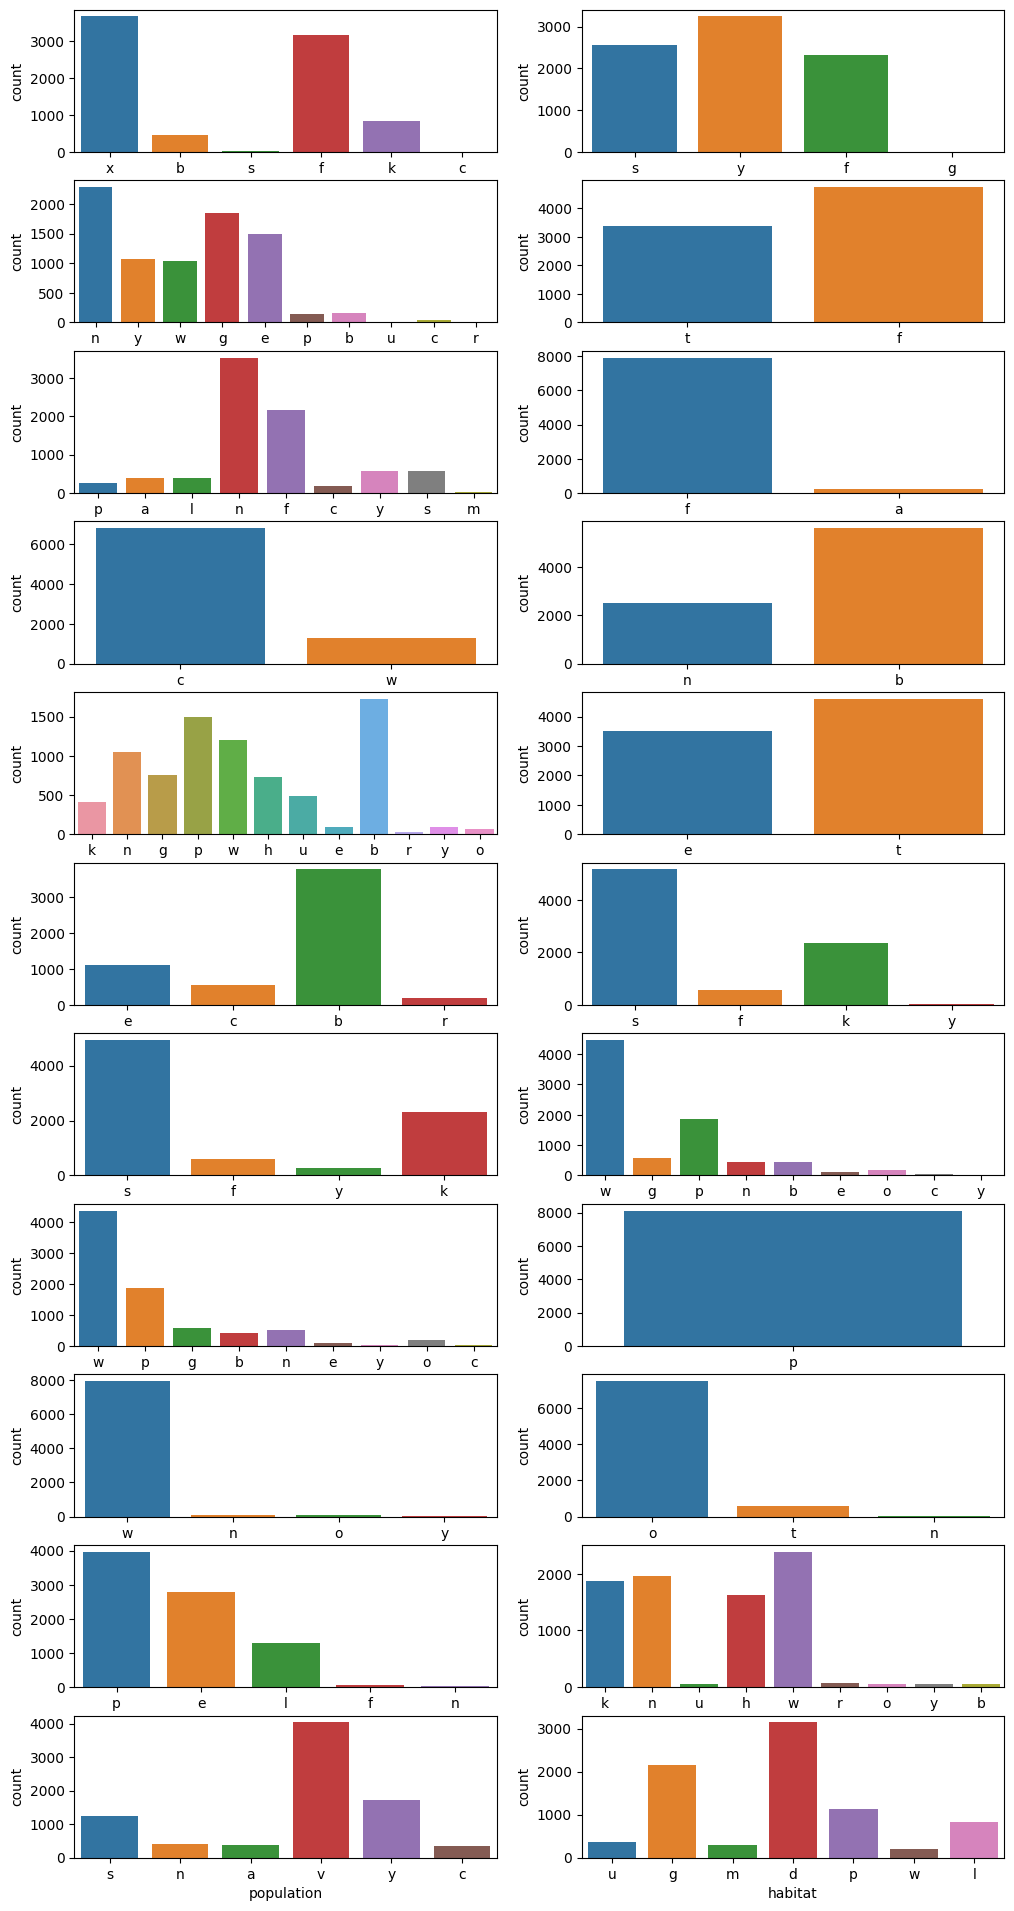

In [6]:
import math
fig, axs = plt.subplots(math.ceil(len(feature_cols)/2), 2, figsize=(12,24))
axs = axs.flat

for i,  col in enumerate(feature_cols):
    sns.countplot(df, x=col, ax=axs[i])
plt.show()

<Axes: xlabel='poisonous', ylabel='count'>

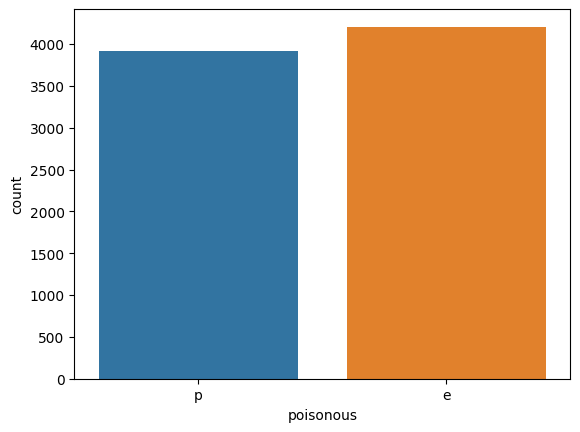

In [7]:
sns.countplot(df, x='poisonous')

In [8]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='most_frequent')
df['stalk-root'] = np.reshape(impute.fit_transform(df[['stalk-root']]), -1)

In [9]:
y = df['poisonous']
X = df[feature_cols].copy()

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test , y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.preprocessing import OneHotEncoder
OH = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [12]:
X_train = OH.fit_transform(X_train)
X_test = OH.transform(X_test)

C:\Users\DELL INSPIRON 5625\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


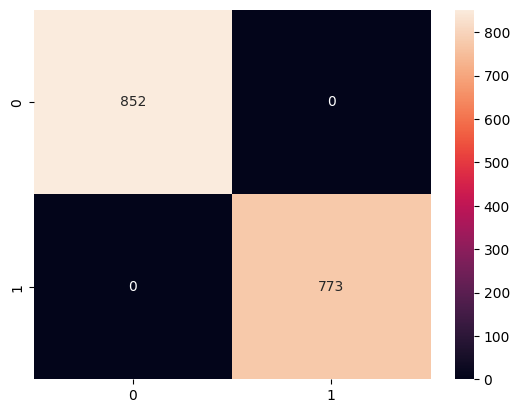

1.0

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)

confusion_matrix = confusion_matrix(y_test, pred)
sns.heatmap(confusion_matrix,fmt='d', annot=True)
plt.show()
accuracy_score(y_test, pred)